# Implementation of ML algorithms for NSL-KDD dataset - final code

In [135]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.ensemble import GradientBoostingClassifier
from pycaret.classification import *

In [239]:

train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [240]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [242]:
ds_train_orig=pd.read_csv(train_url,header=None, names = col_names)
ds_test_orig=pd.read_csv(test_url, header=None, names = col_names)

In [245]:
ds_train = pd.read_csv(train_url,header=None, names = col_names)


ds_test = pd.read_csv(test_url, header=None, names = col_names)

In [246]:
ds2=pd.concat([ds_train,ds_test], axis=0)
ds=pd.concat([ds_train,ds_test], axis=0)
ds.loc[(ds.label != 'normal'),'label']='attack'




In [142]:
###pose as binary probelm  ####convert multiclass in to binary class problem
ds_train.loc[(ds_train.label != 'normal'),'label']='attack'


In [143]:
ds_test.loc[(ds_test.label != 'normal'),'label']='attack'

In [253]:
pd.set_option('display.max_rows',8)
ds2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal
22543,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,21,0.08,0.03,0.00,0.00,0.00,0.00,0.44,1.00,mscan


In [64]:
ds_train.loc[(ds_train.label !="normal"),'label'].count()

58630

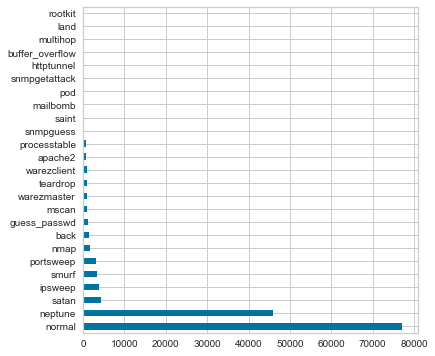

In [550]:
##### multiclass
import matplotlib.pyplot as plt
ds2['label'].value_counts().head(25).plot(kind='barh', figsize=(6,6))

In [ ]:
#######Binary class
### total data set visualization

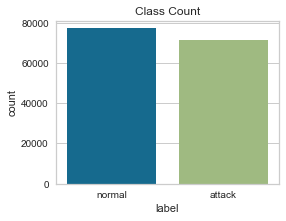

In [590]:
###count of each class distribution 
Y=ds
ax = sns.countplot(x='label', data=Y)
plt.rcParams['figure.figsize']=(4,3)
plt.title("Class Count")
plt.show()


In [ ]:
## percentage distribution

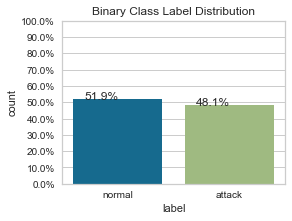

In [565]:

total = len(Y)*1.
ax=sns.countplot(x="label", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.title("Binary Class Label Distribution")
plt.rcParams['figure.figsize']=(4,3)
plt.show()


In [ ]:
####total data set visualization(Milti class)


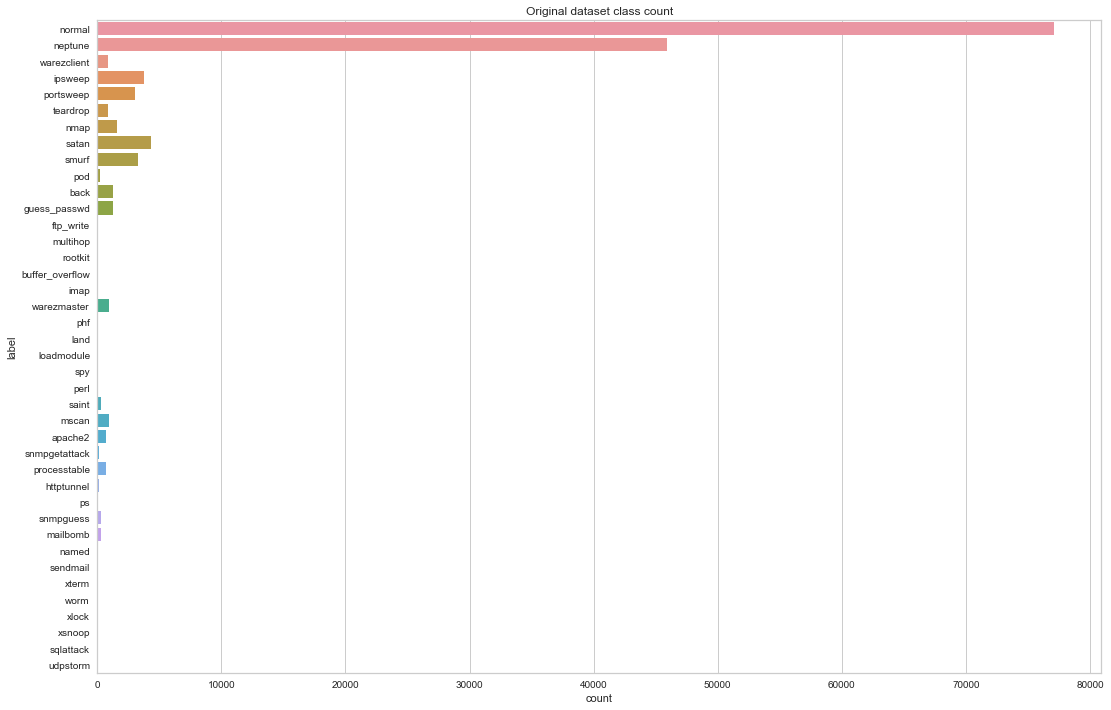

In [588]:
Y=ds2
ax = sns.countplot(y='label', data=Y)
plt.rcParams['figure.figsize']=(18,12)
plt.title("Original dataset class count")
plt.show()

In [ ]:
### total datset multiclass class label percentage distribution

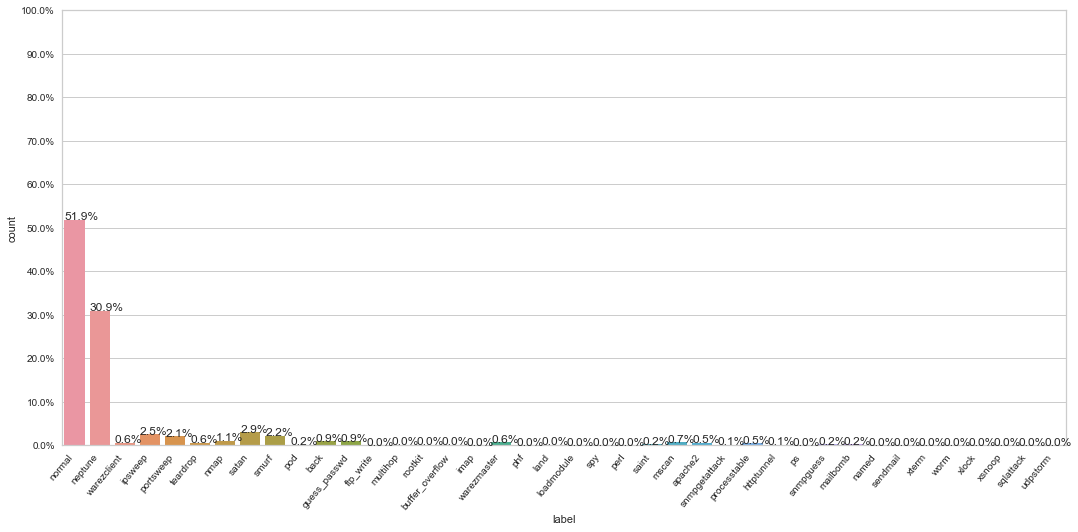

In [577]:
total = len(Y)*1.
ax=sns.countplot(x="label", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.01, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#plt.figure(figsize=(18, 16))
#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
#plt.title("Original dataset class distribution")
#plt.tight_layout()
#plt.title("Original dataset class distribution")
plt.rcParams['figure.figsize']=(18,8)
plt.show()

### PCA/TSNE 

##### Note -- it will take more than an hour to run 

In [545]:
from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = X_train
labels_1000 = y_train
#data= 
#labels= label


model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df_bin = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))



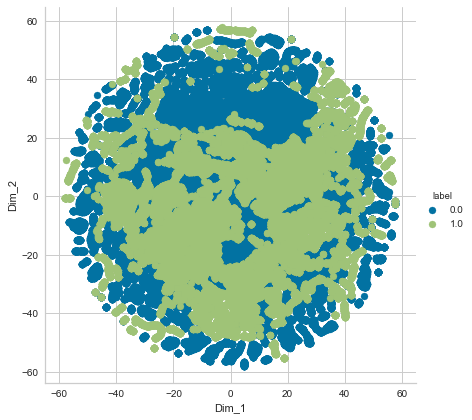

In [546]:
### TSNE of binary classification dataset.
# T-sne of original dataset
sns.FacetGrid(tsne_df_bin, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

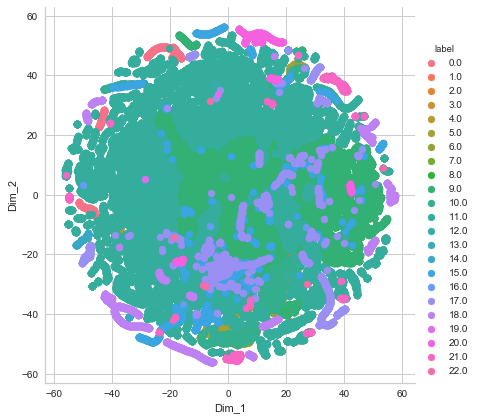

In [126]:
# T-sne of original dataset
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## LGBM


### Feature engineering using pycaret

In [379]:
dsp_tr = setup(session_id=416,data = ds, 
             target = 'label',sampling=False,train_size=0.85,
             numeric_imputation = 'mean',
             categorical_features = ['protocol_type','service','flag'], 
             normalize=True,normalize_method='minmax',
             polynomial_features=True,polynomial_degree=2,
             #combine_rare_levels=True,
             #group_features=list,
             #feature_selection=True,feature_selection_threshold=0.8, ##important features
             #remove_multicollinearity=True,multicollinearity_threshold=0.8,
             
            #pca=True,pca_components=0.99, 
             #ignore_low_variance=True,
               #feature_interaction = True,
                  silent=True )

X_train_en=dsp_tr[2]
X_test_en=dsp_tr[3]
y_train_en=dsp_tr[4]
y_test_en=dsp_tr[5]

 
Setup Succesfully Completed!


,Description,Value
0,session_id,416
1,Target Type,Binary
2,Label Encoded,"attack: 0, normal: 1"
3,Original Data,"(148517, 42)"
4,Missing Values,False
5,Numeric Features,26
6,Categorical Features,15
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### LGBM using scikit learn

In [329]:
import lightgbm as lgb
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train_en, y_train_en)
y_pred_lgb1 = model_lgbm.predict(X_test_en)
y_prob_lgbm=model_lgbm.predict_proba(X_test_en)

In [330]:
model_lgbm 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#### model evaluation by scikit learn

In [333]:
accuracy = accuracy_score(y_test_en, y_pred_lgb1)
print("accuracy:",accuracy)
f1score=f1_score(y_test_en, y_pred_lgb1)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test_en, y_pred_lgb1)
print("confusion matrix:\n",cm)
pr=precision_score(y_test_en,y_pred_lgb1)
print("Precision:",pr)
rs=recall_score(y_test_en,y_pred_lgb1)
print("Recall_score:",rs)
# misclassified_samples = X_test[y_test_en != y_pred_lgb1]
# mc=misclassified_samples.shape[0]
# print("Misclassified :",mc)

accuracy: 0.996139689379657
f1-acore: 0.9962847762225678
confusion matrix:
 [[10661    59]
 [   27 11531]]
Precision: 0.994909404659189
Recall_score: 0.9976639557016785


### LGBM using pycaret

In [380]:
lgbm  = create_model('lightgbm',fold=5) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9959,0.9999,0.9970,0.9950,0.9960,0.9917
1,0.9957,0.9999,0.9973,0.9944,0.9958,0.9914
2,0.9957,0.9999,0.9974,0.9943,0.9958,0.9914
3,0.9960,0.9999,0.9966,0.9957,0.9961,0.9920
4,0.9958,0.9999,0.9972,0.9948,0.9960,0.9917
Mean,0.9958,0.9999,0.9971,0.9949,0.9960,0.9916
SD,0.0001,0.0000,0.0003,0.0005,0.0001,0.0002


#### hyper parameter tuning

In [381]:
 
tuned_lightgbm = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9956,0.9999,0.9965,0.9951,0.9958,0.9913
1,0.9967,1.0000,0.9971,0.9965,0.9968,0.9933
2,0.9960,0.9999,0.9963,0.9960,0.9962,0.9921
3,0.9967,1.0000,0.9982,0.9954,0.9968,0.9933
4,0.9955,0.9999,0.9966,0.9947,0.9957,0.9910
5,0.9953,0.9999,0.9966,0.9944,0.9955,0.9906
6,0.9963,0.9999,0.9960,0.9968,0.9964,0.9925
7,0.9952,0.9999,0.9954,0.9954,0.9954,0.9905
8,0.9964,0.9999,0.9968,0.9963,0.9966,0.9929
9,0.9960,0.9999,0.9973,0.9951,0.9962,0.9921


#### Feature imprtance by LGBM

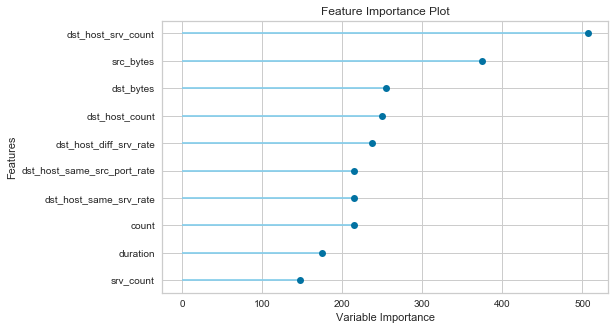

In [207]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')

#### Impact of features by LGBM

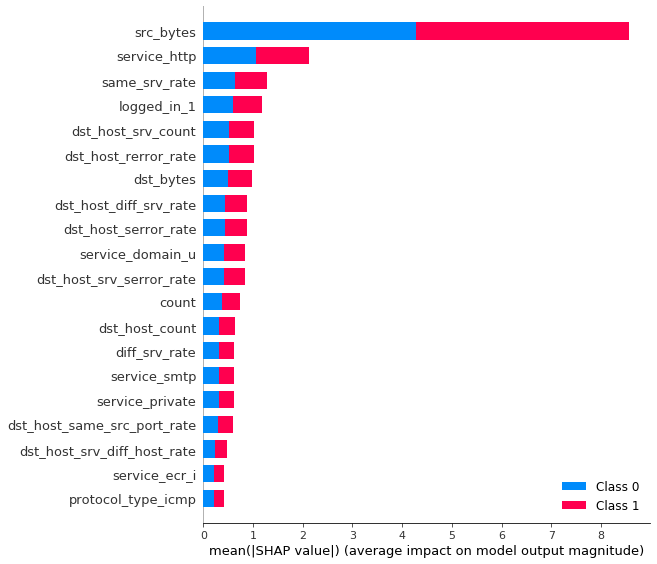

In [23]:
interpret_model(tuned_lightgbm)

#### Learning Curve

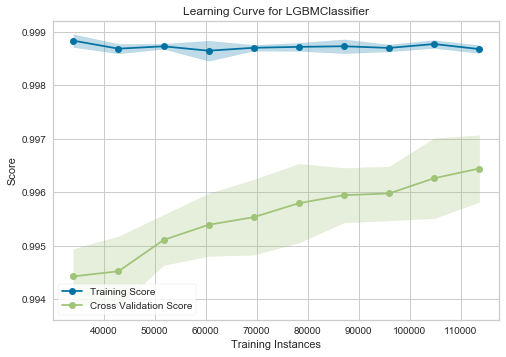

In [25]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

In [215]:
tuned_lightgbm 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.7, max_depth=40,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
               n_estimators=120, n_jobs=-1, num_leaves=60, objective=None,
               random_state=2900, reg_alpha=0.8, reg_lambda=0.6, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

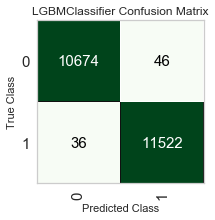

In [391]:
plt.rcParams['figure.figsize']=(3,3)
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')


In [392]:
save_model(tuned_lightgbm, 'lgbm_saved_5_3_2020')

Transformation Pipeline and Model Succesfully Saved


## SGB

### Gradient Boosting by scikit-learn

In [335]:
%%time
model_sgb=XGBClassifier(max_depth=5,learning_rate=0.2,subsample=0.4,colsample_bytree=0.8,colsample_bylevel=0.1,n_estimators=200,n_jobs=-1)
model_sgb.fit(X_train_en, y_train_en)
y_pred_sgb = model_sgb.predict(X_test_en)
y_prob_sgb=model_sgb.predict_proba(X_test_en)

Wall time: 38.5 s


In [337]:
accuracy = accuracy_score(y_test_en, y_pred_sgb)
print("accuracy:",accuracy)
f1score=f1_score(y_test_en, y_pred_sgb)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test_en, y_pred_sgb)
print("confusion matrix:\n",cm)
pr=precision_score(y_test_en,y_pred_sgb)
print("Precision:",pr)
rs=recall_score(y_test_en,y_pred_sgb)
print("Recall_score:",rs)
misclassified_samples = X_test_en[y_test_en != y_pred_sgb]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9950175060597899
f1-acore: 0.9952033187848408
confusion matrix:
 [[10652    68]
 [   43 11515]]
Precision: 0.9941293274626608
Recall_score: 0.9962796331545251
Misclassified : 111


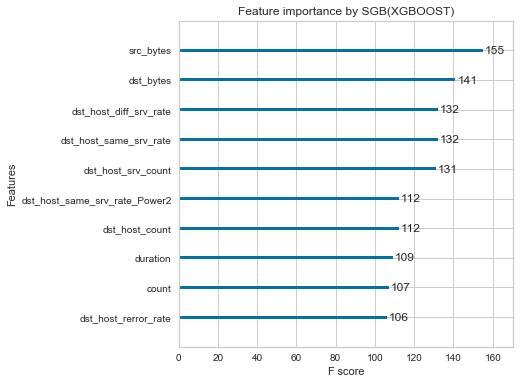

In [338]:

from xgboost import plot_importance
#plot_importance(model,max_num_features=15,)
#plot_importance(model)
plt.rcParams['figure.figsize']=(6,6)
plot_importance(model_sgb, ax=None, height=0.1, xlim=None, ylim=None, title='Feature importance by SGB(XGBOOST)', xlabel='F score', ylabel='Features', importance_type='weight', max_num_features=10, grid=True,)
#pyplot.show()

### Gradient boosting using pycaret

In [221]:
xgb  = create_model('gbc',fold=3) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9891,0.9988,0.9888,0.9903,0.9895,0.9782
1,0.9891,0.9987,0.9904,0.9887,0.9895,0.9782
2,0.9893,0.9986,0.9903,0.9890,0.9897,0.9785
Mean,0.9892,0.9987,0.9898,0.9893,0.9896,0.9783
SD,0.0001,0.0001,0.0007,0.0007,0.0001,0.0001


#### Hyper parameter tuning SGB

In [222]:
tuned_xgb = tune_model('gbc',fold=3)
tuned_xgb

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9963,0.9995,0.9967,0.9961,0.9964,0.9925
1,0.9961,0.9996,0.9969,0.9956,0.9962,0.9922
2,0.9958,0.9995,0.9964,0.9955,0.9959,0.9916
Mean,0.9961,0.9996,0.9967,0.9957,0.9962,0.9921
SD,0.0002,0.0001,0.0002,0.0003,0.0002,0.0004


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.13, loss='deviance', max_depth=90,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=155,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2900, subsample=0.5000000000000001,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

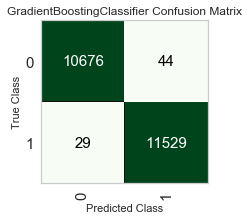

In [223]:
plot_model(estimator = tuned_xgb, plot = 'confusion_matrix')

## Random Forest

### RF by scikit learn

In [339]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100,max_depth=40,random_state=0,n_jobs=-1)
model_rf.fit(X_train_en, y_train_en)
print(model_rf)
y_pred_rf = model_rf.predict(X_test_en)
y_prob_rf = model_rf.predict_proba(X_test_en)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [340]:

accuracy = accuracy_score(y_test_en, y_pred_rf)
print("accuracy:",accuracy)
f1score=f1_score(y_test_en, y_pred_rf)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test_en, y_pred_rf)
print("confusion matrix:\n",cm)
pr=precision_score(y_test_en,y_pred_rf)
print("Precision:",pr)
rs=recall_score(y_test_en,y_pred_rf)
print("Recall_score:",rs)
misclassified_samples = X_test_en[y_test_en != y_pred_rf]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9955561540533262
f1-acore: 0.9957196593021748
confusion matrix:
 [[10664    56]
 [   43 11515]]
Precision: 0.9951603145795523
Recall_score: 0.9962796331545251
Misclassified : 99


In [342]:
import pandas as pd
feature_importances = pd.DataFrame(model_rf.feature_importances_,
                                   index = X_train_en.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances[0:10]

,importance
src_bytes,0.130481
dst_bytes,0.097096
dst_host_srv_count,0.064425
same_srv_rate_Power2,0.053872
flag_SF,0.050765
diff_srv_rate,0.049469
dst_host_srv_count_Power2,0.036532
dst_host_diff_srv_rate,0.036000
same_srv_rate,0.030011
dst_host_same_src_port_rate,0.025851


### RF by pycaret

In [281]:
rf  = create_model('rf') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9947,0.9990,0.9945,0.9953,0.9949,0.9894
1,0.9951,0.9990,0.9947,0.9959,0.9953,0.9902
2,0.9956,0.9997,0.9962,0.9954,0.9958,0.9913
3,0.9950,0.9997,0.9954,0.9950,0.9952,0.9900
...,...,...,...,...,...,...
8,0.9946,0.9995,0.9960,0.9936,0.9948,0.9892
9,0.9949,0.9994,0.9948,0.9954,0.9951,0.9898
Mean,0.9949,0.9994,0.9952,0.9949,0.9951,0.9898
SD,0.0005,0.0002,0.0007,0.0010,0.0005,0.0010


#### hyper parameter tuning

In [283]:
tuned_rf = tune_model('rf',fold=3)
tuned_rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9953,0.9998,0.9966,0.9944,0.9955,0.9906
1,0.9952,0.9999,0.9966,0.9943,0.9954,0.9905
2,0.9953,0.9999,0.9971,0.9940,0.9955,0.9907
Mean,0.9953,0.9998,0.9967,0.9942,0.9955,0.9906
SD,0.0000,0.0000,0.0002,0.0002,0.0000,0.0001


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=60, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=2900,
                       verbose=0, warm_start=False)

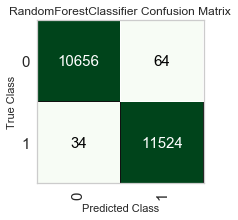

In [285]:
plt.rcParams['figure.figsize']=(3,3)
plot_model(estimator = tuned_rf, plot = 'confusion_matrix')


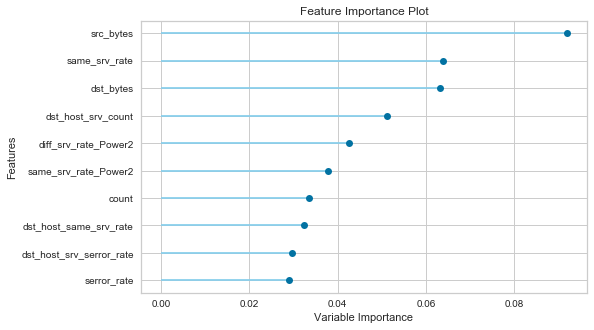

In [286]:
plot_model(estimator = tuned_rf, plot = 'feature')

### Naive Bayes

### Feature engineering by pycaret

In [ ]:
### the following preproceesing did the magic for NB
##ignore_low_variance=True ,  remove_multicollinearity=True , multicollinearity_threshold=0.8

In [480]:
dsp_tr = setup(session_id=416,data = ds, 
             target = 'label',sampling=False,train_size=0.85,
             numeric_imputation = 'mean',
             categorical_features = ['protocol_type','service','flag'], 
             normalize=True,normalize_method='zscore',
             #polynomial_features=True,polynomial_degree=2,
             combine_rare_levels=True,
             #group_features=list,
             #feature_selection=True,feature_selection_threshold=0.5, ##important features
             remove_multicollinearity=True,multicollinearity_threshold=0.8,
             
            #pca=True,pca_components=0.99, 
             ignore_low_variance=True,
                  silent=True )

X_train_nb=dsp_tr[2]
X_test_nb=dsp_tr[3]
y_train_nb=dsp_tr[4]
y_test_nb=dsp_tr[5]

 
Setup Succesfully Completed!


,Description,Value
0,session_id,416
1,Target Type,Binary
2,Label Encoded,"attack: 0, normal: 1"
3,Original Data,"(148517, 42)"
4,Missing Values,False
5,Numeric Features,26
6,Categorical Features,15
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### NB by scikit learn

In [481]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
#from sklearn.neighbors import KNeighborsClassifier
model_nb=BernoulliNB()
#model_nb=GaussianNB()
model_nb.fit(X_train_nb, y_train_nb)
#y_pred = model_nb.predict(X_test_nb)
y_pred_nb = model_nb.predict(X_test_nb)
y_prob_nb = model_nb.predict_proba(X_test_nb)

Wall time: 491 ms


In [592]:
model_nb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [482]:
accuracy = accuracy_score(y_test_nb, y_pred_nb)
print("accuracy:",accuracy)

f1score=f1_score(y_test_nb, y_pred_nb)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test_nb, y_pred_nb)
print("confusion matrix:\n",cm)
pr=precision_score(y_test_nb,y_pred_nb)
print("Precision:",pr)
rs=recall_score(y_test_nb,y_pred_nb)
print("Recall_score:",rs)
misclassified_samples = X_test_nb[y_test_nb != y_pred_nb]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9192925756351558
f1-acore: 0.9245235496599782
confusion matrix:
 [[ 9468  1252]
 [  546 11012]]
Precision: 0.8979125896934116
Recall_score: 0.9527599930783872
Misclassified : 1798


### NB by pycaret

In [483]:
nb=create_model('nb')  

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6663,0.6570,0.9977,0.6089,0.7562,0.3144
1,0.6616,0.6522,0.9979,0.6055,0.7537,0.3046
2,0.6653,0.6569,0.9962,0.6084,0.7554,0.3125
3,0.6666,0.6581,0.9965,0.6093,0.7562,0.3152
4,0.6628,0.6534,0.9971,0.6065,0.7542,0.3071
5,0.6688,0.6593,0.9983,0.6106,0.7577,0.3197
6,0.6629,0.6545,0.9971,0.6065,0.7542,0.3074
7,0.6641,0.6567,0.9973,0.6074,0.7549,0.3100
8,0.6641,0.6563,0.9983,0.6072,0.7551,0.3100
9,0.6597,0.6513,0.9974,0.6043,0.7526,0.3007


In [484]:
nb

GaussianNB(priors=None, var_smoothing=1e-09)

#### Impact of hyper tuning for Nauve bayes using pycaret

In [485]:
tuned_nb=tune_model('nb',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9280,0.9693,0.9663,0.9020,0.9330,0.8554
1,0.9288,0.9689,0.9655,0.9038,0.9336,0.8570
2,0.9276,0.9703,0.9655,0.9019,0.9326,0.8546
3,0.9257,0.9692,0.9618,0.9015,0.9307,0.8508
4,0.9247,0.9664,0.9670,0.8960,0.9302,0.8487
5,0.9300,0.9702,0.9684,0.9036,0.9349,0.8594
6,0.9266,0.9669,0.9649,0.9008,0.9317,0.8527
7,0.9258,0.9676,0.9663,0.8984,0.9311,0.8509
8,0.9269,0.9694,0.9659,0.9004,0.9320,0.8531
9,0.9269,0.9662,0.9658,0.9005,0.9320,0.8531


In [486]:

tuned_nb

GaussianNB(priors=None, var_smoothing=0.003)

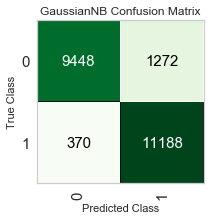

In [487]:
plt.rcParams['figure.figsize']=(3,3)
plot_model(estimator = tuned_nb, plot = 'confusion_matrix')

## Logistic Regression 

### Feature Engineering by pycaret

In [ ]:
# normalize=True,normalize_method='minmax' will do magic for LR , improves accuracy by 5%

In [361]:
dsp_tr = setup(session_id=416,data = ds, 
             target = 'label',sampling=False,train_size=0.85,
             numeric_imputation = 'mean',
             categorical_features = ['protocol_type','service','flag'], 
             normalize=True,normalize_method='minmax',
             polynomial_features=True,polynomial_degree=2,
             #combine_rare_levels=True,
             #group_features=list,
             feature_selection=True,feature_selection_threshold=0.5, ##important features
             #remove_multicollinearity=True,multicollinearity_threshold=0.8,
             
            #pca=True,pca_components=0.99, 
             ignore_low_variance=True,
                  silent=True )

X_train_lr=dsp_tr[2]
X_test_lr=dsp_tr[3]
y_train_lr=dsp_tr[4]
y_test_lr=dsp_tr[5]

 
Setup Succesfully Completed!


,Description,Value
0,session_id,416
1,Target Type,Binary
2,Label Encoded,"attack: 0, normal: 1"
3,Original Data,"(148517, 42)"
4,Missing Values,False
5,Numeric Features,26
6,Categorical Features,15
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### LR by Scikit-learn

In [362]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(C=0.1,random_state=0)
model_lr.fit(X_train_lr, y_train_lr)
y_pred_lr = model_lr.predict(X_test_lr)
y_prob_lr = model_lr.predict_proba(X_test_lr)

In [299]:
accuracy = accuracy_score(y_test_lr, y_pred_lr)
print("accuracy:",accuracy)

f1score=f1_score(y_test_lr, y_pred_lr)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test_lr, y_pred_lr)
print("confusion matrix:\n",cm)
pr=precision_score(y_test_lr,y_pred_lr)
print("Precision:",pr)
rs=recall_score(y_test_lr,y_pred_lr)
print("Recall_score:",rs)
misclassified_samples = X_test_lr[y_test_lr != y_pred_lr]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9477511446269863
f1-acore: 0.9503073770491803
confusion matrix:
 [[ 9984   736]
 [  428 11130]]
Precision: 0.9379740434855891
Recall_score: 0.9629693718636442
Misclassified : 1164


In [363]:
create_model('lr',fold=3) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9491,0.9890,0.9618,0.9414,0.9515,0.8981
1,0.9478,0.9891,0.9635,0.9376,0.9503,0.8953
2,0.9481,0.9888,0.9634,0.9383,0.9507,0.8960
Mean,0.9484,0.9890,0.9629,0.9391,0.9508,0.8965
SD,0.0006,0.0002,0.0008,0.0017,0.0005,0.0012


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=416, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### hyper parameter tuning 

In [364]:
tuned_lr = tune_model('lr',fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9514,0.9892,0.9611,0.9462,0.9536,0.9027
1,0.9493,0.9893,0.9621,0.9414,0.9516,0.8983
2,0.9503,0.9890,0.9618,0.9436,0.9526,0.9004
Mean,0.9503,0.9891,0.9616,0.9437,0.9526,0.9005
SD,0.0009,0.0001,0.0004,0.0020,0.0008,0.0018


In [365]:
tuned_lr

LogisticRegression(C=9.245000000000001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=416, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

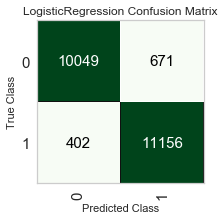

In [367]:
plt.rcParams['figure.figsize']=(3,3)
plot_model(estimator = tuned_lr, plot = 'confusion_matrix')

## KNN

### Feature Engineering by pycaret

In [369]:
dsp_tr = setup(session_id=416,data = ds, 
             target = 'label',sampling=False,train_size=0.85,
             numeric_imputation = 'mean',
             categorical_features = ['protocol_type','service','flag'], 
             normalize=True,normalize_method='minmax',
             #polynomial_features=True,polynomial_degree=2,
             #combine_rare_levels=True,
             #group_features=list,
             #feature_selection=True,feature_selection_threshold=0.5, ##important features
             #remove_multicollinearity=True,multicollinearity_threshold=0.8,
             
            #pca=True,pca_components=0.99, 
             ignore_low_variance=True,
                  silent=True )

X_train_knn=dsp_tr[2]
X_test_knn=dsp_tr[3]
y_train_knn=dsp_tr[4]
y_test_knn=dsp_tr[5]

 
Setup Succesfully Completed!


,Description,Value
0,session_id,416
1,Target Type,Binary
2,Label Encoded,"attack: 0, normal: 1"
3,Original Data,"(148517, 42)"
4,Missing Values,False
5,Numeric Features,26
6,Categorical Features,15
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### KNN by scikit learn

In [ ]:
## Model training and ealuation by scikit learn

In [370]:

%%time
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree',n_jobs=-1)
model_knn.fit(X_train_knn, y_train_knn)
y_pred_knn = model_knn.predict(X_test_knn)
y_prob_knn= model_knn.predict_proba(X_test_knn)

Wall time: 1min 10s


In [591]:
model_knn

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [306]:
accuracy = accuracy_score(y_test_knn, y_pred_knn)
print("accuracy:",accuracy)

f1score=f1_score(y_test_knn, y_pred_knn)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test_knn, y_pred_knn)
print("confusion matrix:\n",cm)
pr=precision_score(y_test_knn,y_pred_knn)
print("Precision:",pr)
rs=recall_score(y_test_knn,y_pred_knn)
print("Recall_score:",rs)
misclassified_samples = X_test_knn[y_test_knn != y_pred_knn]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9902594487835533
f1-acore: 0.9906137808728751
confusion matrix:
 [[10610   110]
 [  107 11451]]
Precision: 0.9904852521408183
Recall_score: 0.990742342965911
Misclassified : 217


### KNN by Pycaret

In [464]:
knn  = create_model('knn',fold=3)  

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9863,0.9963,0.9880,0.9857,0.9868,0.9726
1,0.9858,0.9964,0.9887,0.9840,0.9863,0.9715
2,0.9854,0.9960,0.9870,0.9848,0.9859,0.9707
Mean,0.9858,0.9962,0.9879,0.9848,0.9864,0.9716
SD,0.0004,0.0002,0.0007,0.0007,0.0004,0.0008


#### hyper parameter tuning

In [465]:
tuned_knn = tune_model('knn',fold=3)


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9877,0.9877,0.9876,0.9886,0.9881,0.9753
1,0.9875,0.9875,0.9878,0.9881,0.9880,0.9750
2,0.9867,0.9867,0.9866,0.9877,0.9872,0.9733
Mean,0.9873,0.9873,0.9874,0.9882,0.9878,0.9746
SD,0.0004,0.0004,0.0005,0.0004,0.0004,0.0009


In [488]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

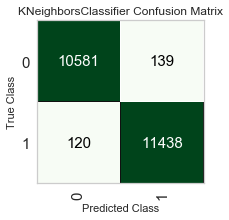

In [467]:
plt.rcParams['figure.figsize']=(3,3)
plot_model(estimator = tuned_knn, plot = 'confusion_matrix')

### Multiple ROC in Single PLot

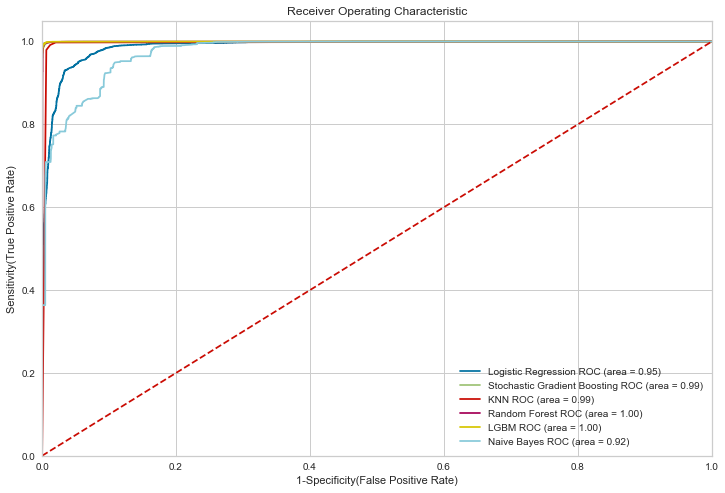

In [376]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'pred': y_pred_lr,
    'prob':y_prob_lr,
    'model': model_lr,
    'y_test' :y_test_lr
},
{
    'label': 'Stochastic Gradient Boosting',
    'pred': y_pred_sgb,
    'prob':y_prob_sgb,
    'model': model_sgb,
    'y_test' :y_test_en
    
},
    {
    'label': 'KNN',
    'pred': y_pred_knn,
    'prob':y_prob_knn,
    'model':model_knn ,
    'y_test' :y_test_knn
        
},
    {
    'label': 'Random Forest',
    'pred': y_pred_rf,
    'model': model_rf,
    'prob':y_prob_rf,
    'y_test' :y_test_en
},
    {
    'label': 'LGBM',
    'pred': y_pred_lgb1,
    'model': model_lgbm,
    'prob':y_prob_lgbm,
    'y_test' :y_test_en,
},
 {
    'label': 'Naive Bayes',
    'pred': y_pred_nb,
    'model': model_nb,
    'prob':y_prob_nb,
     'y_test' :y_test_nb
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    #model.fit(X_train, y_train) # train the model
#     y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds =  roc_curve(m['y_test'], (m['prob'])[:,1])
# Calculate Area under the curve to display on the plot
    auc =  roc_auc_score(m['y_test'],m['pred'])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize']=(12,8)
plt.show()   # Display


## User interface

In [539]:

txt = input("input(paste) data point in the data format of NSL-KDD ")
df_test=pd.DataFrame(txt.split("\t")).T 

df_tst=df_test.set_axis(list(X_test_nb.columns), axis=1, inplace=False)
pr=model_nb.predict(df_test)
if pr==0:
    print("\n The given flow represents an attack \n")
else:
    print("\n \nTHe given flow represents Normal traffic")




input(paste) data point in the data format of NSL-KDD -0.007391	-0.688047	-0.321774	-0.348092	1.554973	1.218511	-0.433294	-0.148823	0.086408	-0.584813	-0.422074	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0

 
THe given flow represents Normal traffic


In [534]:

X_test_nb[34:35]


,src_bytes,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_others_infrequent,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_RSTO,flag_RSTR,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,flag_others_infrequent,logged_in_0
87137,-0.007391,-0.688047,-0.321774,-0.348092,1.554973,1.218511,-0.433294,-0.148823,0.086408,-0.584813,-0.422074,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [540]:
y_test_nb[34:35]

87137    1
Name: label, dtype: int32

In [ ]:
#pd.set_option('display.max_columns',185)